In [125]:
import pandas as pd

df_bridge_two = pd.read_csv('df_bridge_two.csv')

print(df_bridge_two.head())


   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  local_lat  \
0             0             0             0           0     39.073   
1             1             1             1           1     39.073   
2             2             2             2           2     39.073   
3             3             3             3           3     39.073   
4             4             4             4           4     39.073   

   local_long   dest_lat  dest_long  time arround car  time arround walk  ...  \
0  -77.130806  39.064361 -77.128028             269.7             1411.4  ...   
1  -77.130806  39.062361 -77.126250             287.9             1600.0  ...   
2  -77.130806  39.057556 -77.122778             350.3             1830.1  ...   
3  -77.130806  39.053861 -77.125389             430.3             2445.6  ...   
4  -77.130806  39.054472 -77.119194             371.4             2066.8  ...   

   time bridge one walk  time bridge one bike  length bridge two walk  \
0                14

In [126]:
df_bridge_two = df_bridge_two.iloc[:, 4:]

print(df_bridge_two.head())

   local_lat  local_long   dest_lat  dest_long  time arround car  \
0     39.073  -77.130806  39.064361 -77.128028             269.7   
1     39.073  -77.130806  39.062361 -77.126250             287.9   
2     39.073  -77.130806  39.057556 -77.122778             350.3   
3     39.073  -77.130806  39.053861 -77.125389             430.3   
4     39.073  -77.130806  39.054472 -77.119194             371.4   

   time arround walk  time arround bike  length arround car  \
0             1411.4              476.7              2020.3   
1             1600.0              603.1              2290.6   
2             1830.1              642.2              2976.9   
3             2445.6              831.3              3693.0   
4             2066.8              708.9              3342.2   

   length arround walk  length arround bike  time bridge one walk  \
0               1960.3               2209.8                1403.7   
1               2222.3               2434.3                1592.3   
2    

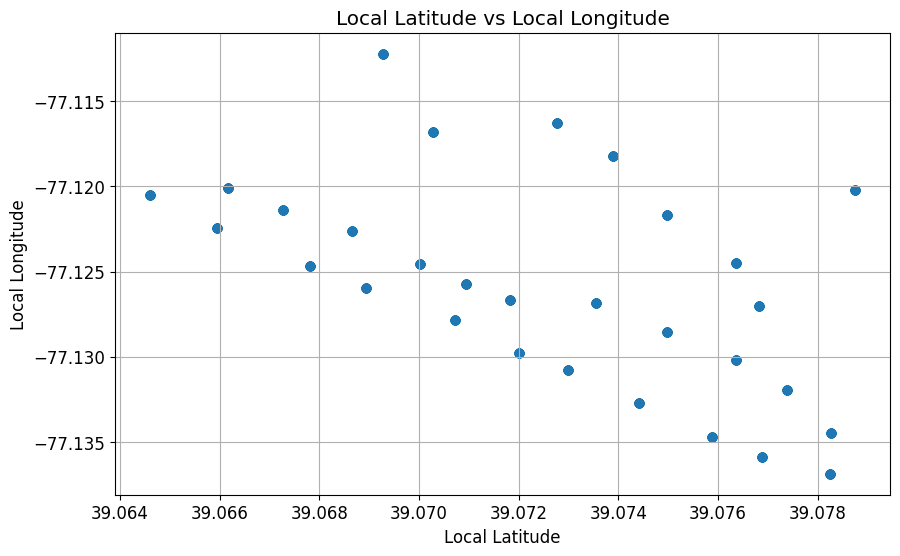

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_bridge_two['local_lat'], df_bridge_two['local_long'], alpha=0.5)
plt.xlabel('Local Latitude')
plt.ylabel('Local Longitude')
plt.title('Local Latitude vs Local Longitude')
plt.grid(True)
plt.show()

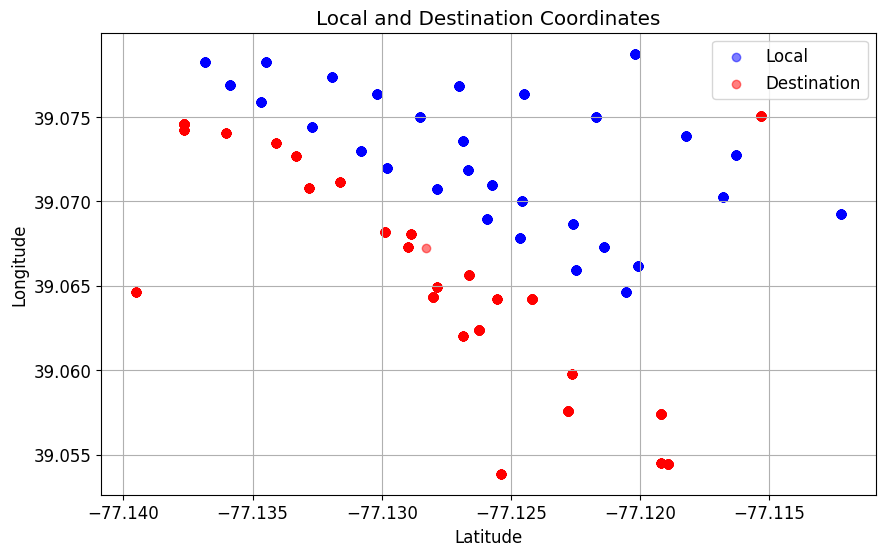

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(df_bridge_two['local_long'], df_bridge_two['local_lat'], color='blue', label='Local', alpha=0.5)
plt.scatter(df_bridge_two['dest_long'], df_bridge_two['dest_lat'], color='red', label='Destination', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Local and Destination Coordinates')
plt.legend()
plt.grid(True)
plt.show()

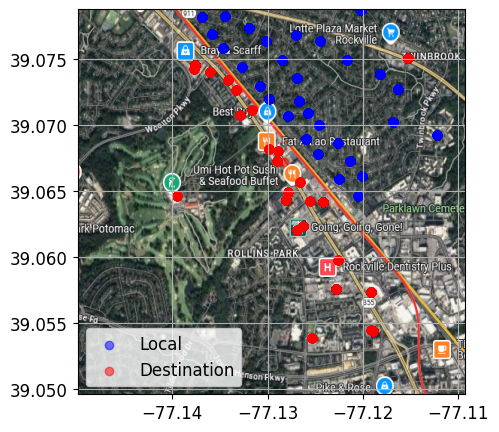

In [129]:
!pip install matplotlib
from matplotlib import ticker
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the background image
background_img = mpimg.imread('background.png')

# Get the extent of your scatter plot data
min_lon, max_lon = -77.1499, -77.1093
min_lat, max_lat = 39.0496, 39.0788
plt.figure(figsize=(5, 5))

# Display the background image
plt.imshow(background_img, extent=[min_lon, max_lon, min_lat, max_lat], aspect='auto')

# Plot the scatter data on top of the background
plt.scatter(df_bridge_two['local_long'], df_bridge_two['local_lat'], color='blue', label='Local', alpha=0.5)
plt.scatter(df_bridge_two['dest_long'], df_bridge_two['dest_lat'], color='red', label='Destination', alpha=0.5)
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.grid(True)
plt.show()

local_lat  local_long   dest_lat  dest_long  time arround car

time bridge one bike  length bridge two walk  length bridge two bike

location type destination type  time bridge two walk  time bridge two bike

length bridge one walk  length bridge one bike

time arround walk  time arround bike  length arround car

length arround walk  length arround bike

In [130]:
df_bridge_two['min_bike_time'] = df_bridge_two[['time bridge two bike', 'time bridge one bike', 'time arround bike']].min(axis=1)
df_bridge_two['min_walk_time'] = df_bridge_two[['time bridge two walk', 'time bridge one walk', 'time arround walk']].min(axis=1)
df_bridge_two['min_bike_distance'] = df_bridge_two[['length bridge two bike', 'length bridge two bike', 'length arround bike']].min(axis=1)
df_bridge_two['min_walk_distance'] = df_bridge_two[['length bridge two walk', 'length bridge one walk', 'length arround walk']].min(axis=1)
print(df_bridge_two.sum())

local_lat                                                          59820.11
local_long                                                   -118079.500693
dest_lat                                                       59808.150555
dest_long                                                    -118080.776611
time arround car                                                   480823.0
time arround walk                                                 2297634.7
time arround bike                                                  801804.0
length arround car                                                3847620.4
length arround walk                                               3191211.4
length arround bike                                               3367298.1
time bridge one walk                                              3017860.4
time bridge one bike                                              1437643.2
length bridge two walk                                            3755633.9
length bridg

In [131]:
df_filtered = df_bridge_two[
    (~df_bridge_two['destination type'].isin(["twinbrooke center mall", "twinbrooke center restaurant", "twinbrooke center groceries"]))
]

numerical_cols_new = df_filtered.select_dtypes(include=['number'])

print(numerical_cols_new.sum()/len(numerical_cols_new))
print(numerical_cols_new.sum())

local_lat                   39.072574
local_long                 -77.125735
dest_lat                    39.064117
dest_long                  -77.127272
time arround car           320.711103
time arround walk         1532.307009
time arround bike          537.306870
length arround car        2575.073907
length arround walk       2128.238376
length arround bike       2246.007148
time bridge one walk      1905.822693
time bridge one bike       922.550590
length bridge two walk    2337.082582
length bridge two bike    2672.854615
time bridge two walk      1682.689244
time bridge two bike       634.569674
length bridge one walk    2646.983414
length bridge one bike    3074.514296
min_bike_time              500.958015
min_walk_time             1400.589591
min_bike_distance         2073.179320
min_walk_distance         1945.287786
dtype: float64
local_lat                 5.630358e+04
local_long               -1.111382e+05
dest_lat                  5.629139e+04
dest_long                -1.1114

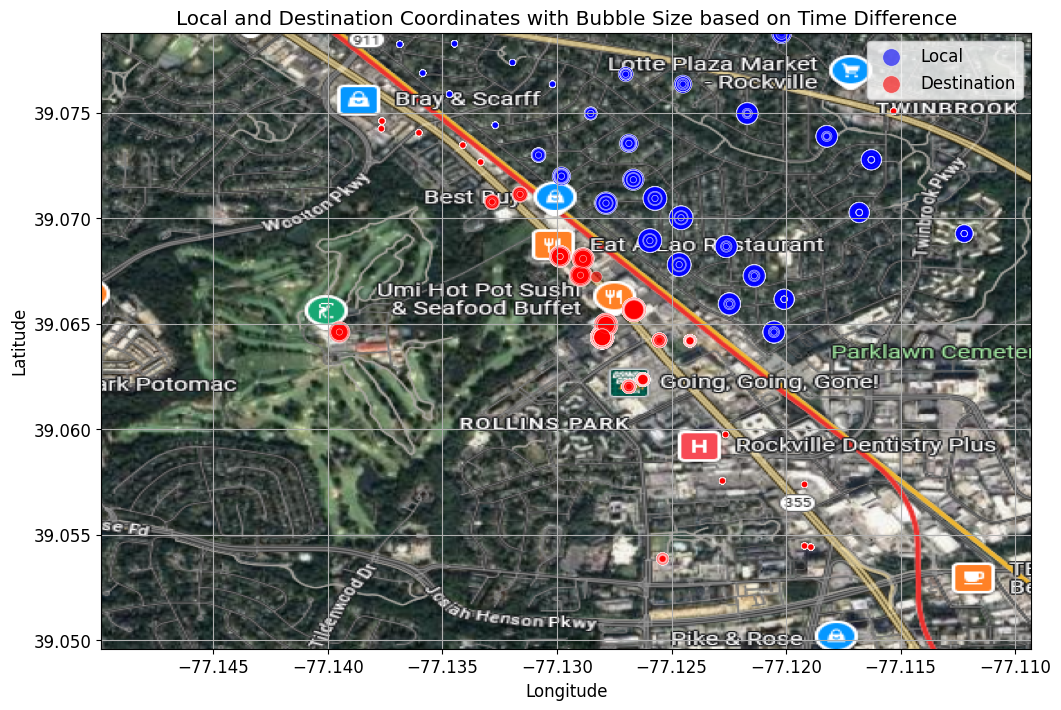

In [132]:
df_bridge_two['time_diff'] = abs(df_bridge_two['min_bike_time'] - df_bridge_two['time arround bike'])

bubble_size = df_bridge_two['time_diff'] + 20

plt.figure(figsize=(12, 8))

background_img = mpimg.imread('background.png')

# Get the extent of your scatter plot data
min_lon, max_lon = -77.1499, -77.1093
min_lat, max_lat = 39.0496, 39.0788
plt.imshow(background_img, extent=[min_lon, max_lon, min_lat, max_lat], aspect='auto')
# Plot the scatter data with bubble size based on the time difference
plt.scatter(df_bridge_two['local_long'], df_bridge_two['local_lat'], s=bubble_size, color='blue', label='Local', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.scatter(df_bridge_two['dest_long'], df_bridge_two['dest_lat'], s=bubble_size, color='red', label='Destination', alpha=0.6, edgecolors='w', linewidth=0.5)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Local and Destination Coordinates with Bubble Size based on Time Difference')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
numerical_cols = df_bridge_two.select_dtypes(include=['number'])

print(numerical_cols.sum()/len(df_bridge_two))

local_lat                   39.072573
local_long                 -77.125735
dest_lat                    39.064762
dest_long                  -77.126569
time arround car           314.058132
time arround walk         1500.741150
time arround bike          523.712606
length arround car        2513.141999
length arround walk       2084.396734
length arround bike       2199.410908
time bridge one walk      1971.169432
time bridge one bike       939.022338
length bridge two walk    2453.059373
length bridge two bike    2791.618289
time bridge two walk      1766.191182
time bridge two bike       664.987263
length bridge one walk    2737.746048
length bridge one bike    3160.388700
min_bike_time              489.500523
min_walk_time             1376.766754
min_bike_distance         2036.742782
min_walk_distance         1912.200914
time_diff                   34.212084
dtype: float64


In [140]:
print((df_bridge_two['min_bike_time'] < 601).sum())
print((df_bridge_two['min_walk_time'] < 601).sum())
print((df_bridge_two['time arround walk'] < 601).sum())

1133
72
55


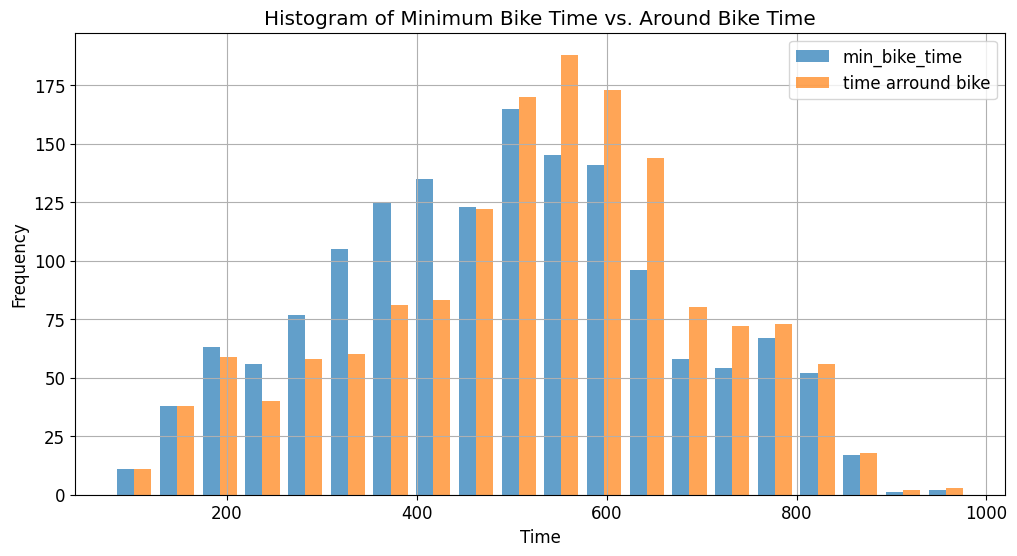

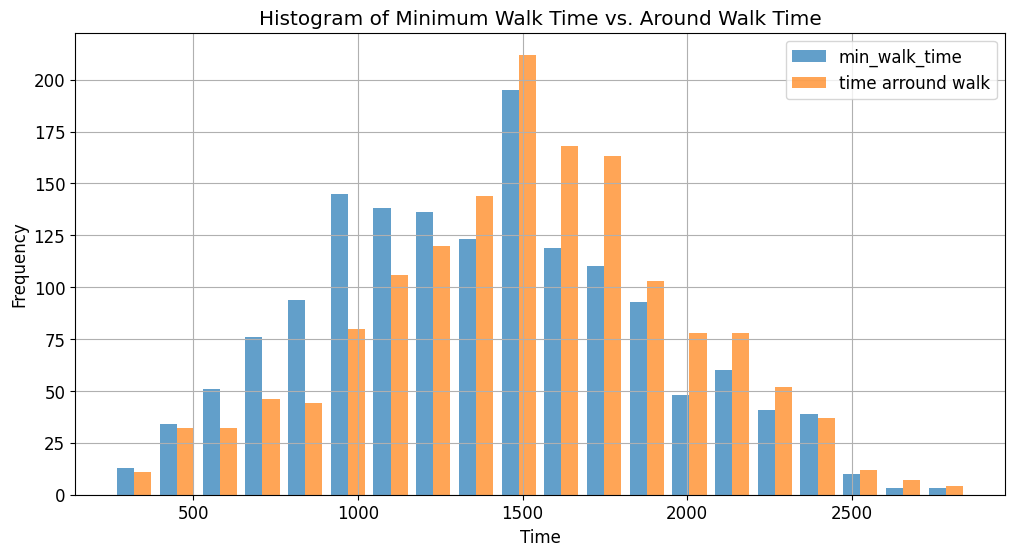

In [134]:
plt.figure(figsize=(12, 6))

plt.hist([df_bridge_two['min_bike_time'], df_bridge_two['time arround bike']], bins=20, alpha=0.7, label=['min_bike_time', 'time arround bike'])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum Bike Time vs. Around Bike Time')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist([df_bridge_two['min_walk_time'], df_bridge_two['time arround walk']], bins=20, alpha=0.7, label=['min_walk_time', 'time arround walk'])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum Walk Time vs. Around Walk Time')
plt.legend()
plt.grid(True)
plt.show()

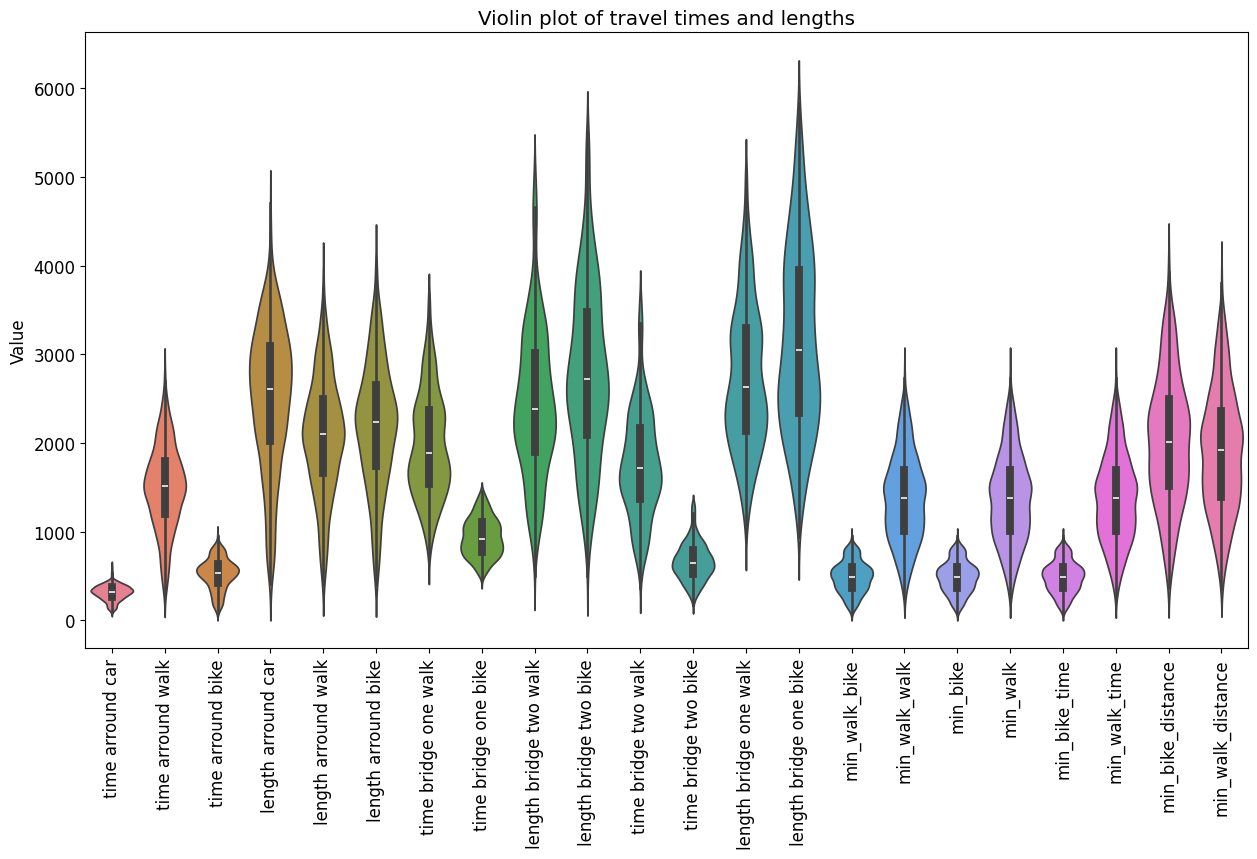

In [135]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.violinplot(data=numerical_cols_for_violin)
plt.xticks(rotation=90)
plt.title('Violin plot of travel times and lengths')
plt.ylabel('Value')
plt.show()

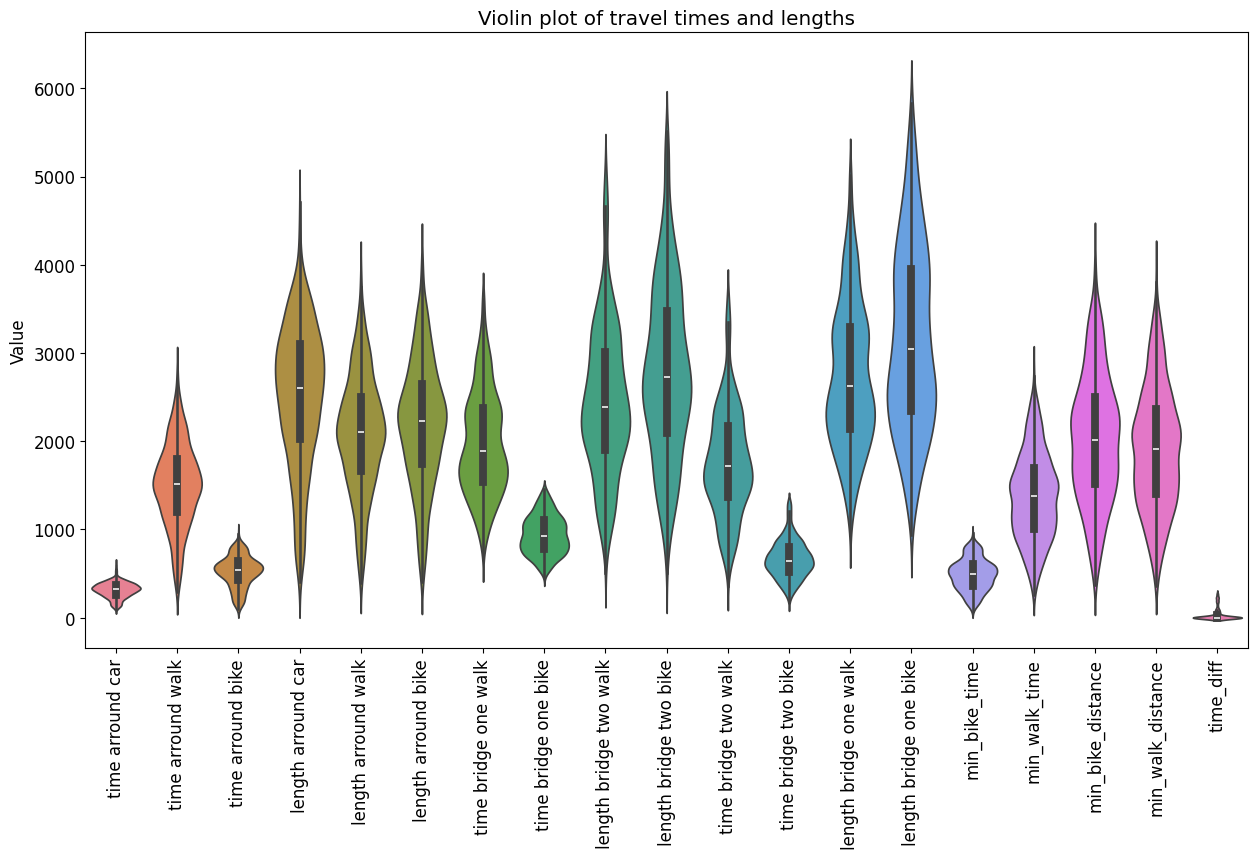

In [136]:
numerical_cols_for_violin = numerical_cols.drop(columns=['local_lat', 'local_long', 'dest_lat', 'dest_long'])

plt.figure(figsize=(15, 8))
sns.violinplot(data=numerical_cols_for_violin)
plt.xticks(rotation=90)
plt.title('Violin plot of travel times and lengths')
plt.ylabel('Value')
plt.show()

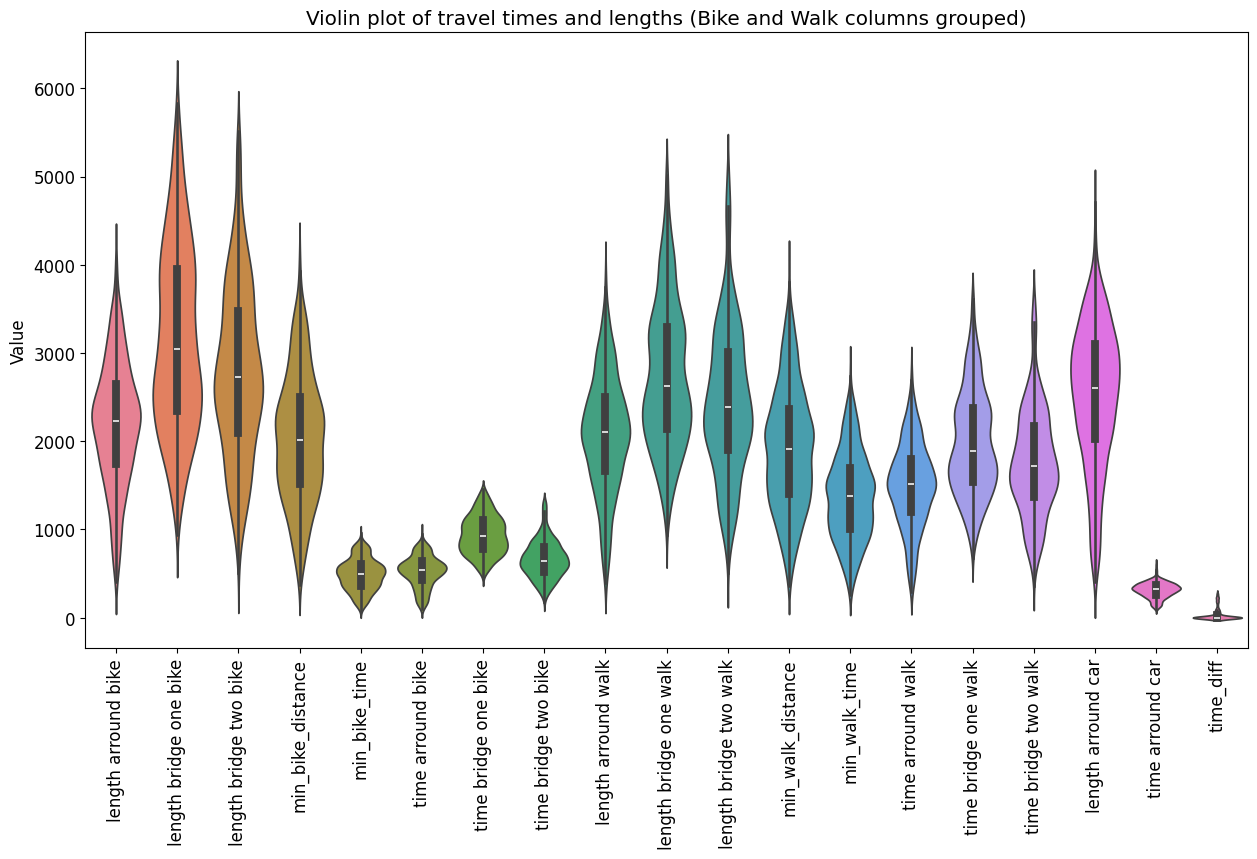

In [137]:
numerical_cols_for_violin = numerical_cols.drop(columns=['local_lat', 'local_long', 'dest_lat', 'dest_long'])

# Rearrange columns: bring 'bike' and 'walk' related columns closer
# Identify bike and walk related columns (example based on column names)
bike_cols = [col for col in numerical_cols_for_violin.columns if 'bike' in col]
walk_cols = [col for col in numerical_cols_for_violin.columns if 'walk' in col]
car_cols = [col for col in numerical_cols_for_violin.columns if 'car' in col]
other_cols = [col for col in numerical_cols_for_violin.columns if 'bike' not in col and 'walk' not in col and 'car' not in col]

# Define the new order
# This is a simplified way, you might need a more specific order if needed
new_order = []
# Interleave bike and walk columns, or group them as desired
# Example: Group all bike then all walk, then car, then others
new_order = sorted(bike_cols) + sorted(walk_cols) + sorted(car_cols) + sorted(other_cols)

# Reindex the DataFrame with the new order
numerical_cols_for_violin_reordered = numerical_cols_for_violin[new_order]

plt.figure(figsize=(15, 8))
sns.violinplot(data=numerical_cols_for_violin_reordered)
plt.xticks(rotation=90)
plt.title('Violin plot of travel times and lengths (Bike and Walk columns grouped)')
plt.ylabel('Value')
plt.show()

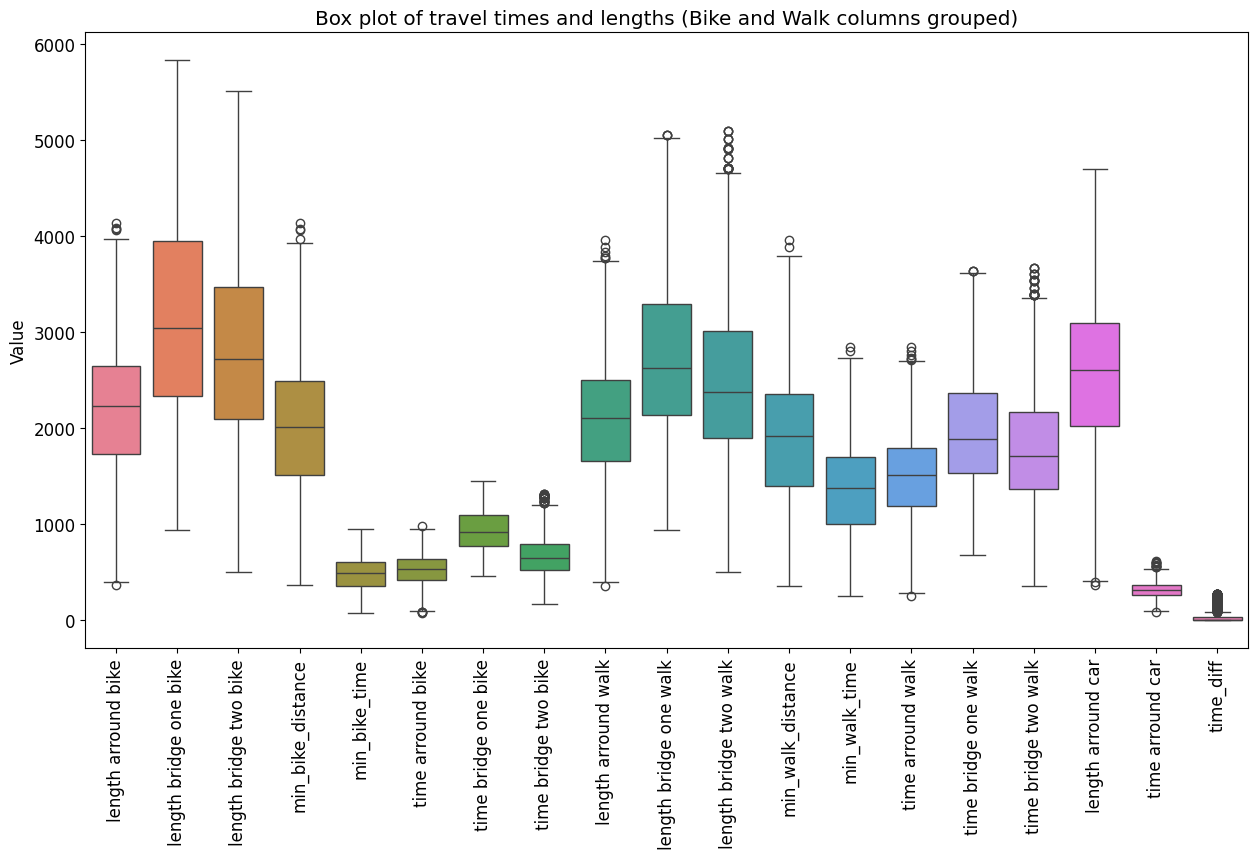

In [138]:
numerical_cols_for_boxplot = numerical_cols.drop(columns=['local_lat', 'local_long', 'dest_lat', 'dest_long'])

# Rearrange columns: bring 'bike' and 'walk' related columns closer
# Identify bike and walk related columns (example based on column names)
bike_cols = [col for col in numerical_cols_for_boxplot.columns if 'bike' in col]
walk_cols = [col for col in numerical_cols_for_boxplot.columns if 'walk' in col]
car_cols = [col for col in numerical_cols_for_boxplot.columns if 'car' in col]
other_cols = [col for col in numerical_cols_for_boxplot.columns if 'bike' not in col and 'walk' not in col and 'car' not in col]

# Define the new order
new_order = sorted(bike_cols) + sorted(walk_cols) + sorted(car_cols) + sorted(other_cols)

# Reindex the DataFrame with the new order
numerical_cols_for_boxplot_reordered = numerical_cols_for_boxplot[new_order]

plt.figure(figsize=(15, 8))
sns.boxplot(data=numerical_cols_for_boxplot_reordered)
plt.xticks(rotation=90)
plt.title('Box plot of travel times and lengths (Bike and Walk columns grouped)')
plt.ylabel('Value')
plt.show()

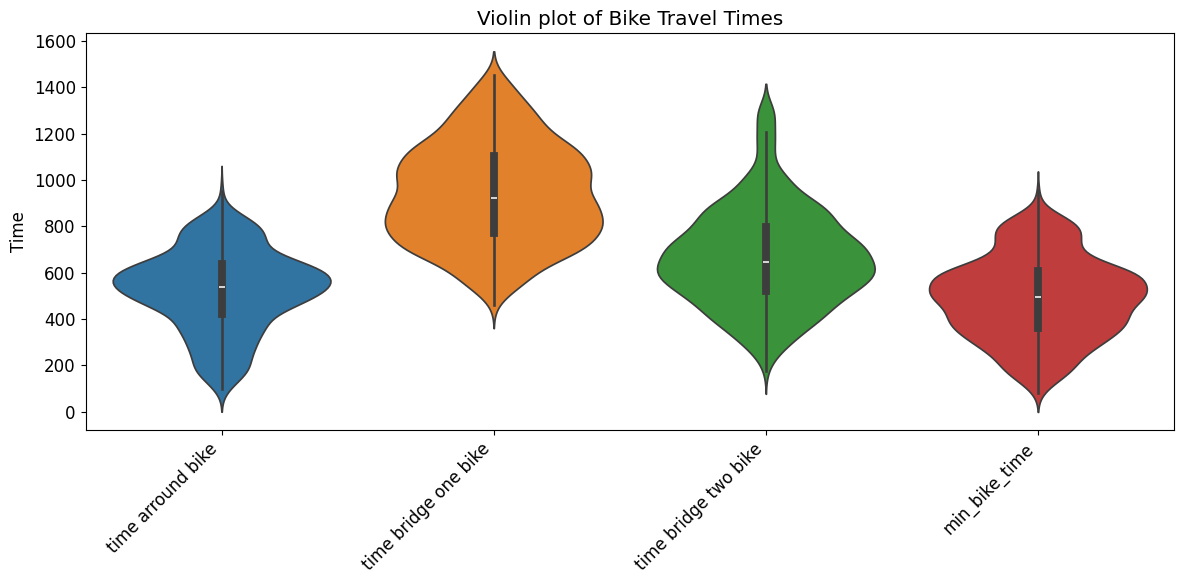

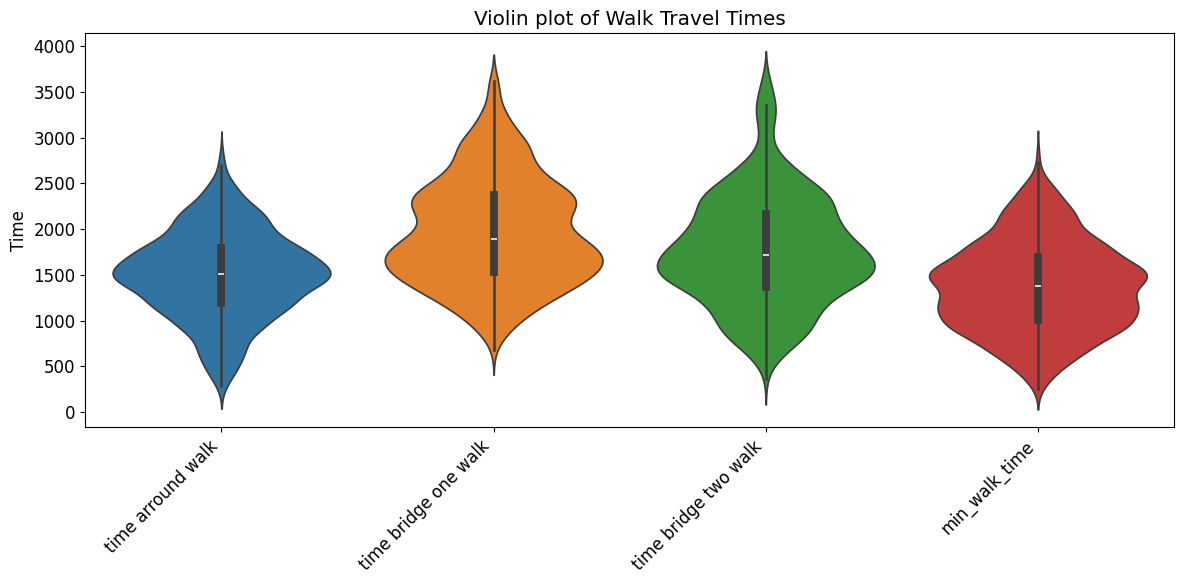

In [139]:
numerical_cols_for_violin = numerical_cols.drop(columns=['local_lat', 'local_long', 'dest_lat', 'dest_long'])

# Identify bike and walk related columns
bike_cols = [col for col in numerical_cols_for_violin.columns if 'bike' in col]
walk_cols = [col for col in numerical_cols_for_violin.columns if 'walk' in col]

# Create separate dataframes for bike and walk times
bike_time_cols = [col for col in bike_cols if 'time' in col]
walk_time_cols = [col for col in walk_cols if 'time' in col]

df_bike_times = numerical_cols_for_violin[bike_time_cols]
df_walk_times = numerical_cols_for_violin[walk_time_cols]


# Violin plot for bike times
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_bike_times)
plt.xticks(rotation=45, ha='right')
plt.title('Violin plot of Bike Travel Times')
plt.ylabel('Time')
plt.tight_layout()
plt.show()

# Violin plot for walk times
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_walk_times)
plt.xticks(rotation=45, ha='right')
plt.title('Violin plot of Walk Travel Times')
plt.ylabel('Time')
plt.tight_layout()
plt.show()
